# Chapter 5.
### Text classification. NLP (Natural Language Processing). Recurrent Neural Networks (RNN).

Looking back at the CNN-based architectures so far, we can see they have always working on one complete snapshot of time. But consider this two sentence fragments:

```The cat sat on the mat.```
```She got up and impatiently climbed on the chair, meowing for food.```

Say you were to feed those two senteces, one after the other, into a CNN and ask, ***where is the cat?***

You'd have a problem, because the network has not concept of memory. This is incredibly important when it comes to dealing with data that has a temporal domain(e.g, text, speech, video, and time=series data). *Recurrent neural networks (RNNs)* answer this problem by giving neural networks a memory via a *Hidden state.*

What does an RNN look like? It is basically an ANN crossed with a for loop.

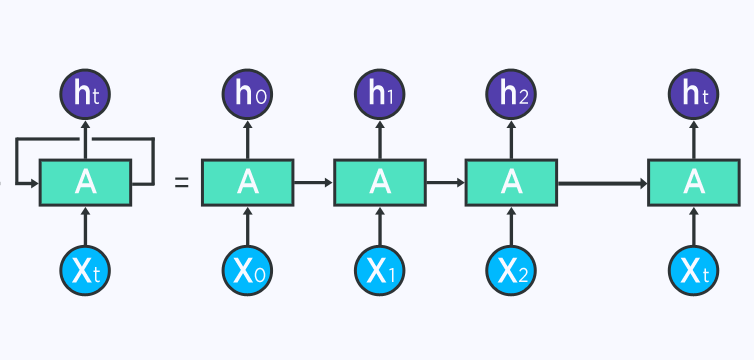


We add input at time step of *t*, and we get a *hidden* output state of *ht*, and the output also gets fed back into the RNN for the next time step. We can unroll this network as shown in the previous figure.

What we have is a group of fully connected layers (with shared parameters), a series of inputs, and our output. Input data is fed into the network, and the next item in the sequence is predicted as output. In the unrolled view, we can see that the RNN can be thought of as a pipeline of fully connected layers, with successive input being fed into the next layer in the sequence (with the usual nonlinearities such as ```ReLU``` being inserted between layers). When we have our completed predicted sequence, we then have to backpropagate the error back through the RNN.
Because this involves stepping back through the network's steps, this process is known as backpropagation through time. The error is calculated on the entire sequence, then the network is unfolded, as in the previous figure, and the gradients are calculated for each time step and combined to update the shared parameters of the network. You can imagine it as doing backprop on individual networks and summing all the gradients together.

That's the theory behind RNNs. But this simple structure leads to problems that has to be overcomed with newer architectures.

# Long Short-Term Memory Networks

In practice, RNNs were suceptible to *vanishing gradient* problem, or the potentionally worse scenario of *exploding gradient*, where your error tends off towards infinity. Neither is good, so RNNs couldn't be brought to bear on many of the problems they were considered suitable for. That changed with the LSTM variant of RNN.

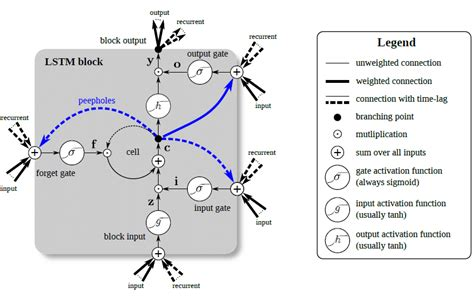

In the standard RNN, we "remember" everything forever. But that's not how our brains work, and the LSTM's forget game allows us to model the idea that as we continue in our input chain, the beginning of the chain becomes less important. And how much the LSTM forgets is something that is learned during training, so if it's in the network's best interes to be very forgetful, the forget parameters will do so.

The *cell* ends up being the "memory" of the network layer; and the input, output, and forget gates will determine how data flows through the layer. The data may simply pass through, it may "write" to the cell, and that data may (or may not) flow through to the next layer, modified by the output gate.

This assemblage of parts was enough to solve the vanishing gradient problem, and also has the virtue of being Turing-complete, so theoretically, you can do any calculation that you can do on a computer with one of these.


# Gated Recurrent Units

The main take away is that the GRU has merged the forget gate with the output gate. This means it has fewer parameters than an LSTM and so tends to be quicker to train and uses fewer resources at runtime. For these reasons, and also that they're essentially a drop-in replacement for LSTMs, they've become quite popular. However, strictly speaking, they are less powerful than LSTMs because of the merging of the forget and output gates.

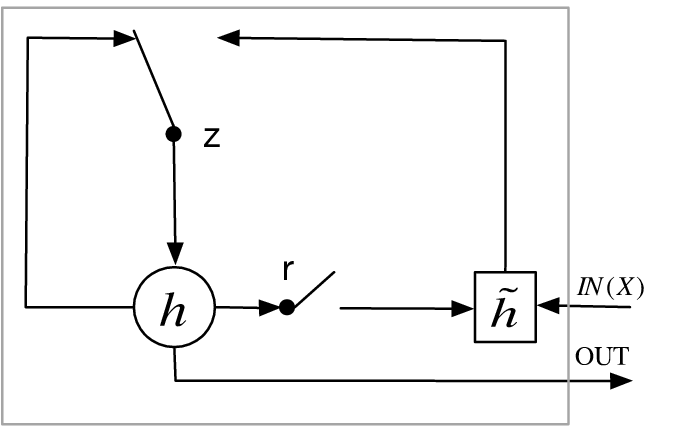

# biLSTM

Another common variant of the LSTM is the *bidirectional* LSTM or *biLSTM* for short. As you've seen so far, traditional LSTMs (and RNNs in general) can look to the past as they are trained and make decisions. Unfortunately, sometimes you need to see the future as well. This is particularly the case in applications like translation and hand-writing recognition, where what comes after the current state can be just as important as the rpevious state for determining output.

A biLSTM solves this problem in the simplest of the ways: it's essentially two stacked LSTM, with the input being sent in the forward direction in one LSTM and reversed in the second. Next figure shows hoe a biLSTM works across its input bidirectionally to produce the output.

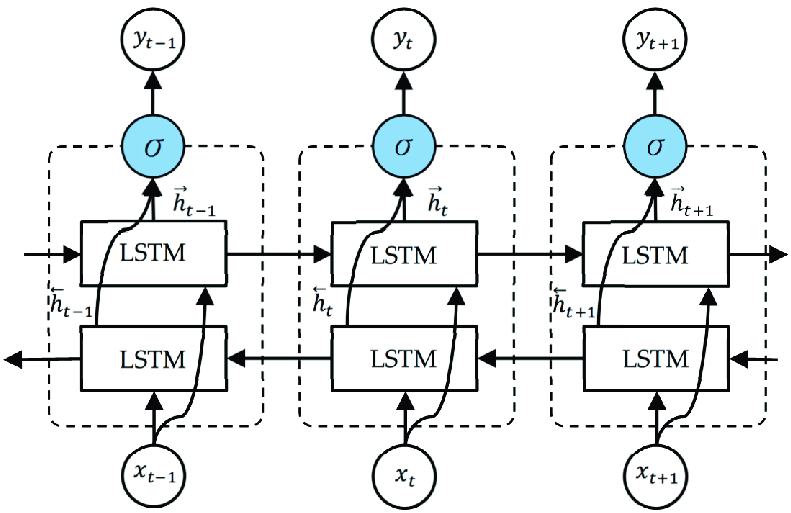

PyTorch makes it easy to create biLSTM bypassing in a ```bidirectional=True``` parameter when creating a ```LSTM()``` unit.

# Embeddings

How do we represent words in a network? After all, we're feeding tensors of numbers into a network and getting tensors out. With images, it seemed a farily obvious thing to convert them into tensors representing the red/green/blue component values, and they're already naturally though of as arrays as they come with a height and width baked in. But words? Sentences? How is that going to work?

The simplest approach is still one that you'll find in many approaches to NLP, and it's called *one hot enconding*. It's pretty simple, lokking at the sentence *The cat sat on the mat*.
if we consider that this is the entire vocabulary of our world, we have a tensor of ```['the', 'cat', 'sat', 'on', 'mat']```. One-hot encoding simply means that we create a vector that is the size of the vocabulaty, and for each word in it, we allocate a vector with one parameter set to 1 and the rest to 0:

In [1]:
import torch

In [2]:
ex = 'The cat sat on mat'

In [3]:
ex_vocab = ex.split()
ex_vocab_size = len(ex_vocab)

In [4]:
vec_init = torch.zeros([ex_vocab_size, ex_vocab_size], dtype=int)

In [5]:
for i in range(ex_vocab_size):
    vec_init[i, i] = 1

In [6]:
vec_init

tensor([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

We've now comverted the words into vectors, and we can feed them into our network. Additionally we may add extra symbols into our vocabulary, such as UNK (Unknown, for words not in the vocabulary) and START/STOP to signify the beginning and ends of sentences.

One-hot encoding has a few limitations that become clearer when we add another word into the example vocabulary: *Kitty*. From our encoding scheme, *Kitty* would be represented by ```[0, 0, 0, 0, 0, 1]``` (with all the other vectors being padded with a zero). First, you can see that if we are going to a realistic set of words, our vectors are going to be very long with almost no information in them. Second, and perphaps more importantly, we know that a *very strong* relationship exists between words *kitty* and *cat*, and this is impossible to represent with one-hot encoding; the two words are completely different things.

An approach that has become more popular recently is replacing one-hot encoding with an *embedding matrix* (of course, a one-hot encoding is an embedding matrix itself, just one that doesn't contain any information about relationships between words). The idea is to squash the dimensionality of the vector space down to something a little more manageable and take advantage of the space itself.

For example, if we have an embedding in 2D space, perhaps *cat* could be represented by the tensor ```[0.56, 0.45]``` and *kitten* by ```[0.56, 0.445]```, whereas *mat* could be ```[0.2, -0.1]```. We cluster similar words together in the vector space and can do distance checks such as Euclidean or cosine distance functions to determine how close words are to each other. 

### Euclidean distance.

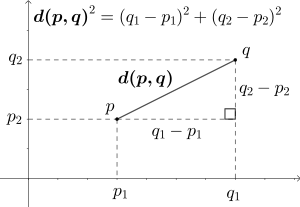

### Cosine distance.
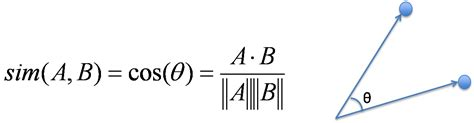

How we determine these words fall in the vector space? An embedding layer is no different from any other layer; we initialize the vector space randomly, and hopefully the training process updates the parameters so that similar words or concepts gravitate toward each other.

A famous example of embedding vectors is *word2vec*. This is a set of word embeddings trained using a shallow neural network, and it revealed that the transformation into vector space seemed to capture something about the concepts underpinning the words. On its commonly cited finding, if you pulled the vectors for *King, Man and Woman* and then subtracted the vector form for *Man* from *King* and added to the vector for *Woman*, you would get a result that was the vector representation for *Queen*. Since *word2vec*, other pretrained embeddings have become available, such as *ELMo*, *GloVe* and *fasttext*.

As for using embeddings in PyTorch, it's really simple:
``` embed = nn.Embedding(vocab_size, dimension_size)```

This will contain a tensor of ```vocab_size x dimension_size``` initialized randomly. This can be thought like a giant array or lookup table. Each word in the vocabulary indexes into an entry that is a vector of ```dimension_size```, so if we go back to the cat example, we'd have something like this.

In [7]:
import torch.nn as nn
from torch import Tensor
cat_mat_embed = nn.Embedding(5,2)
cat_tensor = torch.tensor([1])
cat_mat_embed.forward(cat_tensor)

tensor([[-0.8837, -0.2050]], grad_fn=<EmbeddingBackward>)

We created our embedding, a tensor that contains the position of a cat in our vocabulary, and pass it through the layer's ```forward()``` method. That gives us our random embedding. The result also points out that we have a gradient function that we can use for updating the parameters after we combine it with a loss function.

In [8]:
import pandas as pd

tweets_df = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None)

In [9]:
tweets_df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
tweets_df[0].value_counts()

0    800000
4    800000
Name: 0, dtype: int64

Annoyingly this dataset has not headers, but by looking at it, the column we are interested for is the last one *tweet text* and the first column *the labeling*. However, the labels aren't great. The are no neutral values in the training dataset. This means that we could formulate the problem as a binary choice between 0 and 1 and work out the predictions from there, but for now, we possibly have neutral tweets in the future. To enconde the classes as numbers starting from 0, we first create a column of type ```category``` from the label column:

In [11]:
tweets_df['sentiment_cat'] = tweets_df[0].astype('category')

Then we encode those classes as numerical information in another column:

In [12]:
tweets_df['sentiment'] = tweets_df['sentiment_cat'].cat.codes

Saving the modified csv back to disk:

In [13]:
tweets_df.to_csv('train-processed.csv', header=None, index=None)

Now we tell ```torchtext``` what we think is important for the purposes of creating a dataset.

# Defining fields.

```torchtext``` takes a straightforward approach to generating datasets: you tell it what you want, and it'll process the raw CSV or JSON for you. You do this by first defining *fields*. The ```Field``` class has a considerable number of parameters that can be assigned to it, and although you probably won't use them all, it is good to check it out at the documentation website.

As we noted, we're interested only in the labels and tweets text. We define these by using the ```Field``` datatype:

In [17]:
from torchtext.legacy.data import Field, LabelField
LABEL = LabelField()
TWEET = Field(tokenize='spacy', lower=True)

We're defining ```LABEL``` as a ```LabelField```, which is a subclass of ```Field``` that sets ```sequential``` to ```False``` (as it's our numerical category class). ```TWEET``` is a standart ```Field``` object, where we have decided to use the spaCy tokenizer and convert all the text to lowercase, but otherwise we're using the defauls as listed in the documentation. If, when running through this example, the step of building the vocabulary is taking a very long time, try to remove the ```tokenize``` parameter and rerunning. This will use the default of simply splitting on whitespace, which will speed up the tokenization step considerably, though the created vocabulary will not be as good as spaCy creates.

Having defined those fields, we now need to produce a list that maps them onto the list of rows that are in the CSV:

In [19]:
fields = [('score', None), ('id', None),
         ('date', None), ('query', None),
         ('name', None), ('tweet', TWEET),
         ('category', None), ('label', LABEL)]

Armed with our declared fields, we now use ```TabularDataset``` to apply that definition to the CSV:

In [20]:
from torchtext.legacy.data import TabularDataset
twitterDataset = TabularDataset(path='train-processed.csv',
                               format='CSV',
                               fields=fields,
                               skip_header=False)

Finally we can split into training, testing and validation sets by usint the ```split()``` method:

In [21]:
train, test, valid = twitterDataset.split(split_ratio=[0.8, 0.1, 0.1])
(len(train), len(test), len(valid))

(1280000, 160000, 160000)

In [22]:
vars(train.examples[7])

{'tweet': ['@kylaano',
  'yeaps',
  '!',
  'today',
  'actually',
  '.',
  'i',
  'did',
  "n't",
  'spot',
  'ya',
  "'",
  'though'],
 'label': '0'}

# Building a Vocabulary.

Traditionally, at this point we would build one-hot encoding of each word that is present in the dataset, a rather tedious process. Thankfully, ```torchtext``` will do this for us, and will also allow a ```max_size``` parameter to be passed in to limit the vocabulary to the most common words. This is normally done to prevent the construction of a huge, memory-hungry model. We don't want our GPUs too overwhelmed, after all. Let's limit the vocabulary to a maximum of 20,000 words in our training set:

In [23]:
vocab_size = 20000
TWEET.build_vocab(train, max_size = vocab_size)

We can then interrogate the ```vocab``` class instance object to make some discoveries about our dataset.
First, we ask the traditional *How big is out vocabulary?:*

In [24]:
len(TWEET.vocab)

20002

We defined the vocab lenght to be 20,000, but by default ```torchtext``` will add two more special tokens, **<unk>** for unknown words (e.g., those that get cut off by the 20000 ```max_size``` we specified), and **<pad>**, a padding token that will be used to pad all our text roughly the same size to help with efficient batching on the GPU (remember that a GPU gets its speed from operating on a regular batches). You can also specify ```eos_token``` or ```init_token``` symbols when you declare a field, but they're not included by default.

In [25]:
TWEET.vocab.freqs.most_common(10)

[('i', 798119),
 ('!', 724245),
 ('.', 646316),
 (' ', 469790),
 ('to', 452082),
 ('the', 417506),
 (',', 386301),
 ('a', 304802),
 ('my', 253490),
 ('it', 242850)]

Pretty much what we'd expect, as we're not removing stop-words with our spaCy tokenizer. (Because it's just 140 characters, we'd be in danger of losing too much information from our model if we did.)

Almost done with the datasets. We just need to create a data loader to feed into our training loop. ```torchtext``` provides the ```BucketIterator``` method that will produce what it calls a ```Batch```, which is almost, but not quite, like the data loader used on Chapter 3 and 4. (We'll see that we have to update our training loop to deal with some of the oddities of the ```Batch``` interface.)

In [26]:
from torchtext.legacy.data import BucketIterator
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
                                                (train, valid, test),
                                                batch_size=32,
                                                device=device)

# Creating the model.

We use the ```Embedding``` and ```LSTM``` modules in PyTorch that we talked about to build a simple model for classifying tweets:


In [41]:
class A_LSTM(nn.Module):
    
    def __init__(self, hidden_size,
                embedding_dim, vocab_size):
        super(A_LSTM, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.encoder = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size, num_layers=1)
        self.predictor = nn.Linear(hidden_size, 2)
        
    def forward(self, seq):
        output, (hidden, _) = self.encoder(self.embedding(seq))
        preds = self.predictor(hidden.squeeze(0))
        return preds
model = A_LSTM(100, 300, vocab_size)
model.to(device)

A_LSTM(
  (embedding): Embedding(20000, 300)
  (encoder): LSTM(300, 100)
  (predictor): Linear(in_features=100, out_features=2, bias=True)
)

The model has created three layers. First, the words in our tweets are pushed into a ```Embedding``` layer, which we have established as a 300-dimensional vector embedding. That's then fed into a ```LSTM``` with 100 hidden features (again, we're compressing down from the 300-dimensional input like we did with Chapter3-4). Finally, the output of the LSTM (the final hidden state after processing the incoming tweet) is pushed through a standard fully connected layer with three outputs to correspond to our three possible classes (negative, positive or neutral). Next we turn to the training loop.

# Updating the Training Loop.

Because of some ```torchtext``` quirks, we need to write a slightly modified training loop. First, we create an optimizer (ADAM as usual) and a loss function. Because we were given three potential classes for each tweet, we use ```CrossEntropyLoss()``` as our loss function. However, it turns out that only two classes are present in the dataset; if we assumed there would be only two classes, we could in fact change the output of the model to produce a single number between 0 and 1 and then use binary cross-entropy (BCE) loss (and we can combine the sigmoid layer that squashes output between 0 and 1 plus the BCE layer into a single PyTorch loss function, ```BCEWithLogitsLoss()```). This is mentioned because if you're writing a classifier that must always be one state or the other, it's a better fit than the standard cross-entropy loss that we're about to use.

In [29]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=2e-2)
criterion = nn.CrossEntropyLoss()

In [43]:
def train(epochs, model, optimizer,
         criterion, train_iterator, valid_iterator):
    
    for epoch in range(1, epochs+1):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch_idx, batch in enumerate(train_iterator):
            opt.zero_grad()
            predict = model(batch.tweet)
            loss = criterion(predict, batch.label)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * batch.tweet.size(0)
            training_loss /= len(train_iterator)
            model.eval()
            for batch_idx, batch in enumerate(valid_iterator):
                predict = model(batch.tweet)
                loss = criterion(predict, batch.label)
                valid_loss += loss.data.item() * x.size(0)
                valid_loss /= len(valid_iterator)
                print('Epoch: {}, Training Loss: {:.2f}, Validation Loss: {:.2f}'.format(epoch, training_loss, valid_loss))

The main thing to be aware of in this new training loop is that we have to reference ```batch.tweet``` and ```batch.label``` to get the particular fields we're interested in; they don't fall out quite as nicely from the enumerator as they do in ```torchvision```.

Once we've trained our model by using this function, we can use it to classify some tweets to do simple sentiment analysis.

# Classifying Tweets

Another hassle of ```torchtext``` is that it's a bit of a pain get it to predict things. What you can do is emulate the processing pipeline that happens internally and make the required prediction on the output of that pipeline, as shown, in this small function:

In [31]:
def classify_tweet(tweet):
    categories = {
        0: 'Negative',
        1: 'Positive'
    }
    processed = TWEET.process([TWEET.preprocess(tweet)])
    return categories[model(processed).argmax().item()]

In [45]:
train(10, A_LSTM, optimizer, criterion, train_iterator, valid_iterator)

TypeError: train() missing 1 required positional argument: 'self'